<a href="https://colab.research.google.com/github/jayshreek3/coursera1/blob/main/Easytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Name- Jayshree Keskar**

**Roll no.- BI27 (BEIT)**

Sub- ML and DS Lab

**Assignment no. 2**

Aim- Recognize optical character using ANN

**Installing pytorch and easyocr**

In [2]:
!pip3 install torch==1.10.0+cu102 torchvision==0.11.1+cu102 torchaudio===0.10.0+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:39tcmalloc: large alloc 1147494400 bytes == 0x5650cdcd6000 @  0x7fdf45aa1615 0x565093b9d4cc 0x565093c7d47a 0x565093ba02ed 0x565093c91e1d 0x565093c13e99 0x565093c0e9ee 0x565093ba1bda 0x565093c13d00 0x565093c0e9ee 0x565093ba1bda 0x565093c10737 0x565093c92c66 0x565093c0fdaf 0x565093c92c66 0x565093c0fdaf 0x565093c92c66 0x565093c0fdaf 0x565093ba2039 0x565093be5409 0x565093ba0c52 0x565093c13c25 0x565093c0e9ee 0x565093ba1bda 0x565093c10737 0x565093c0e9ee 0x565093ba1bda 0x565093c0f915 0x565093ba1afa 0x565093c0fc0d 0x565093c0e9ee
     |████████████████████████████████| 881.9 MB 16 kB/s 
     |████████████████████████████████| 23.2 MB 1.5 MB/s 
     |████████████████████████████████| 2.9 MB 28.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9

In [3]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 20 kB/s 
     |████████████████████████████████| 47.6 MB 38 kB/s 


### **Theory-**

**How OCR Works**

An OCR system features a combination of hardware and software. The system’s goal is to scan the text of a physical document and translate the characters within that document to a code that’s then used for data processing. Think of this in context of postal and mail sorting services – OCR is core to their ability to operate quickly in processing destination and return addresses to sort mail faster and more effectively. 

The system does this in three steps:

**1. Image Pre-processing**

In step one, the hardware (usually an optical scanner) processes the physical form of the document into an image – such as an image of an envelope. The goal of this step is for the machine to be accurate in its rendition, but also to remove any unwanted distortions. The resulting image is converted to a black and white version, which is then analyzed for light areas (background) versus dark areas (characters). The OCR system may also categorize the image into separate elements if needed, such as tables, text, or inset imagery.

**2. Intelligent Character Recognition**

AI analyzes the dark areas of the image to identify letters and numbers. Typically, AI targets one character, word, or block of text at a time using one of the following methods:

Pattern recognition: Teams train the AI algorithm on a variety of text, text formats, and handwriting. The algorithm compares the characters on the scanned envelope image to the characters it has already learned in order to identify matches.
Feature extraction: To recognize new characters, the algorithm applies rules regarding specific character features. Features may include the number of angled, crossed, or horizontal lines and curves in a character. An “H” for example has two vertical lines and one horizontal in between; the machine will use those feature identifiers to identify all “H”s on the envelope.

After the machine has identified the characters, they’re converted to an ASCII code that can be used for further manipulations.

**3. Post-processing**

In step three, AI corrects errors in the resulting file. One method is to train the AI on a specific lexicon of words that will be found in the document. Restrict the AI’s output to only those words/format to ensure no interpretations fall outside of the lexicon.


Import dependencies

In [4]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np


1. Read in images or video

In [19]:
IMAGE_PATH = 'surf.jpeg'

In [20]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9862082004547119)]

From above output, we note that the first parameter is the location where the text is located in the image used, second parameter is the text itself, and the last one is the confidence.

**2. Draw results**

In [12]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text= result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX




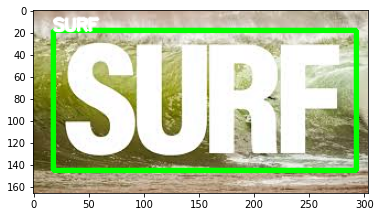

In [13]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()



**3. Handling Multiple Lines**

In [21]:
IMAGE_PATH = 'sign.png'

In [22]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256296390029),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9683687979328574),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973478739152)]

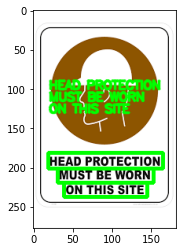

In [23]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

In [28]:
IMAGE_PATH = 'ocr1.png'

In [29]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[165, 193], [267, 193], [267, 231], [165, 231]],
  'Google',
  0.9968053455048328),
 ([[259.31671842700024, 193.65835921350012],
   [355.66421174705806, 174.62087862505228],
   [360.68328157299976, 201.34164078649988],
   [265.33578825294194, 221.37912137494772]],
  'Developers',
  0.9979586115844628)]

In [30]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text= result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

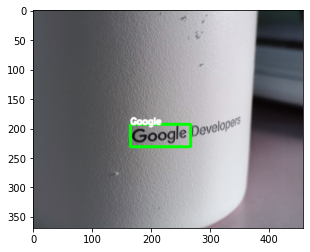

In [31]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()